# Lab 3

## Reading CSV files

In [ ]:
import pandas as pd

training_mice = pd.read_csv('./pw3_data/EEG_mouse_data_1.csv')
training_mice2 = pd.read_csv('./pw3_data/EEG_mouse_data_2.csv')
##testing_mice = pd.read_csv('./pw3_data/EEG_mouse_data_test.csv')

training_data = pd.concat([training_mice, training_mice2], ignore_index=True)


## Choosing features

In [ ]:

feature_list = [
    "amplitude_around_1_Hertz",
    "amplitude_around_2_Hertz",
    "amplitude_around_3_Hertz",
    "amplitude_around_4_Hertz",
    "amplitude_around_5_Hertz",
    "amplitude_around_6_Hertz",
    "amplitude_around_7_Hertz",
    "amplitude_around_8_Hertz",
    "amplitude_around_9_Hertz",
    "amplitude_around_10_Hertz",
    "amplitude_around_11_Hertz",
    "amplitude_around_12_Hertz",
    "amplitude_around_13_Hertz",
    "amplitude_around_14_Hertz",
    "amplitude_around_15_Hertz",
    "amplitude_around_16_Hertz",
    "amplitude_around_17_Hertz",
    "amplitude_around_18_Hertz",
    "amplitude_around_19_Hertz",
    "amplitude_around_20_Hertz",
    "amplitude_around_21_Hertz",
    "amplitude_around_22_Hertz",
    "amplitude_around_23_Hertz",
    "amplitude_around_24_Hertz",
    "amplitude_around_25_Hertz",
]

input_training_mice = training_data[feature_list]
output_training_mice = training_data['state'].to_list()

#training_mice2 = training_mice2[feature_list]
#testing_mice = testing_mice[feature_list]
print(input_training_mice.head())
print(output_training_mice)

   amplitude_around_1_Hertz  amplitude_around_2_Hertz  \
0                  0.000009                  0.000014   
1                  0.000010                  0.000010   
2                  0.000011                  0.000077   
3                  0.000003                  0.000031   
4                  0.000010                  0.000011   

   amplitude_around_3_Hertz  amplitude_around_4_Hertz  \
0                  0.000013                  0.000014   
1                  0.000011                  0.000015   
2                  0.000034                  0.000019   
3                  0.000044                  0.000016   
4                  0.000012                  0.000017   

   amplitude_around_5_Hertz  amplitude_around_6_Hertz  \
0                  0.000023                  0.000009   
1                  0.000022                  0.000017   
2                  0.000013                  0.000006   
3                  0.000007                  0.000006   
4                  0.000020  

## Normalize data

balance data and fit and transform all column except "state"  with StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for column in input_training_mice:
    
    column_data = input_training_mice[column].to_frame()
    scaler.fit(column_data)
    input_training_mice[column] = scaler.transform(column_data)
        
for i,row in enumerate(output_training_mice):
    if row =='w':
        output_training_mice[i] = 1
    else:
        output_training_mice[i] = 0
    
   
print(input_training_mice.head())
print(output_training_mice)

C:\Users\Jarod\AppData\Local\Temp\ipykernel_14400\2680042691.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_training_mice[column] = scaler.transform(column_data)
C:\Users\Jarod\AppData\Local\Temp\ipykernel_14400\2680042691.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_training_mice[column] = scaler.transform(column_data)
C:\Users\Jarod\AppData\Local\Temp\ipykernel_14400\2680042691.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

   amplitude_around_1_Hertz  amplitude_around_2_Hertz  \
0                 -0.209955                 -0.081998   
1                 -0.183434                 -0.325791   
2                 -0.143389                  3.683546   
3                 -0.443261                  0.947062   
4                 -0.187587                 -0.238456   

   amplitude_around_3_Hertz  amplitude_around_4_Hertz  \
0                 -0.105121                 -0.027861   
1                 -0.230518                  0.068381   
2                  1.390184                  0.315788   
3                  2.070365                  0.140069   
4                 -0.177577                  0.177870   

   amplitude_around_5_Hertz  amplitude_around_6_Hertz  \
0                  0.818127                 -0.239219   
1                  0.740384                  0.553920   
2                  0.036759                 -0.564602   
3                 -0.510886                 -0.573552   
4                  0.570556  

## Create model and fold

In [ ]:
import keras
from keras import layers
from sklearn.model_selection import KFold

keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

def create_model():
  # 2 inputs
  # 2 hidden nodes
  # 1 output

  mlp = keras.Sequential([
      layers.Input(25),
      layers.Dense(8, activation="tanh"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(1, activation="tanh"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.99),
      loss="mse",
  )

  return mlp

mlp = create_model()
mlp.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 208       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 217 (868.00 Byte)
Trainable params: 217 (868.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [ ]:
import numpy as np
history_list = []
trained_mlp = []

for i, (train_index, test_index) in enumerate(kf.split(input_training_mice)):
  # We need to create a new model everytime otherwise fit will continue previous training
 
  mlp = create_model()
  x_train, x_test = input_training_mice.iloc[train_index], input_training_mice.iloc[test_index]
  y_train, y_test = np.array(output_training_mice)[train_index],np.array(output_training_mice)[test_index]
  
  
  history = mlp.fit(
      x=x_train, y=y_train,
      validation_data=(x_test, y_test),
      epochs=50
  )

  history_list.append(history)
  trained_mlp.append(mlp)

Epoch 1/50
852/852 [==============================] - 7s 7ms/step - loss: 0.1330 - val_loss: 0.0962
Epoch 2/50
852/852 [==============================] - 5s 6ms/step - loss: 0.0908 - val_loss: 0.0904
Epoch 3/50
852/852 [==============================] - 4s 5ms/step - loss: 0.0878 - val_loss: 0.0883
Epoch 4/50
852/852 [==============================] - 7s 8ms/step - loss: 0.0866 - val_loss: 0.0874
Epoch 5/50
852/852 [==============================] - 6s 8ms/step - loss: 0.0858 - val_loss: 0.0869
Epoch 6/50
852/852 [==============================] - 7s 8ms/step - loss: 0.0852 - val_loss: 0.0871
Epoch 7/50
852/852 [==============================] - 6s 7ms/step - loss: 0.0851 - val_loss: 0.0864
Epoch 8/50
852/852 [==============================] - 7s 9ms/step - loss: 0.0847 - val_loss: 0.0864
Epoch 9/50
852/852 [==============================] - 5s 6ms/step - loss: 0.0846 - val_loss: 0.0864
Epoch 10/50
852/852 [==============================] - 7s 8ms/step - loss: 0.0846 - val_loss: 0.0866

## Plot training history

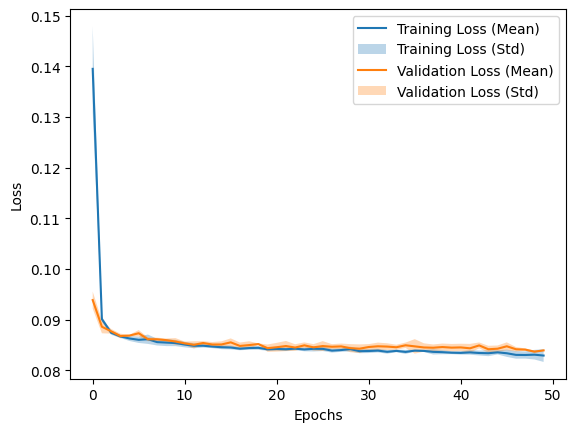

In [ ]:
import matplotlib.pyplot as pl
%matplotlib inline

train_losses = np.array([history.history['loss'] for history in history_list])
val_losses = np.array([history.history['val_loss'] for history in history_list])

# Calculate mean and standard deviation for training and validation losses
mean_train_loss = np.mean(train_losses, axis=0)
std_train_loss = np.std(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)
std_val_loss = np.std(val_losses, axis=0)

# Plot mean and standard deviation for training loss
pl.plot(mean_train_loss, label='Training Loss (Mean)')
pl.fill_between(range(len(mean_train_loss)), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.3, label='Training Loss (Std)')

# Plot mean and standard deviation for validation loss
pl.plot(mean_val_loss, label='Validation Loss (Mean)')
pl.fill_between(range(len(mean_val_loss)), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.3, label='Validation Loss (Std)')

# Add labels and legend
pl.xlabel('Epochs')
pl.ylabel('Loss')
pl.legend()

# Display the plot
pl.show()

## Performance

426/426 [==============================] - 1s 3ms/step


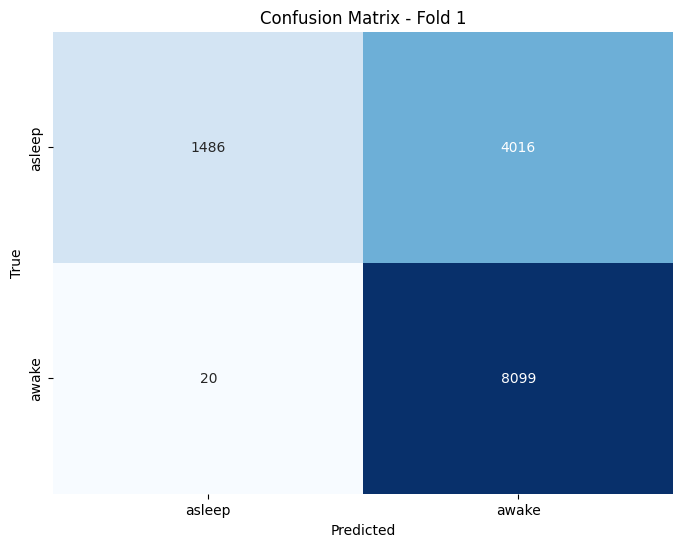

F1 Score - Fold 1: 0.800533755065731
426/426 [==============================] - 1s 3ms/step


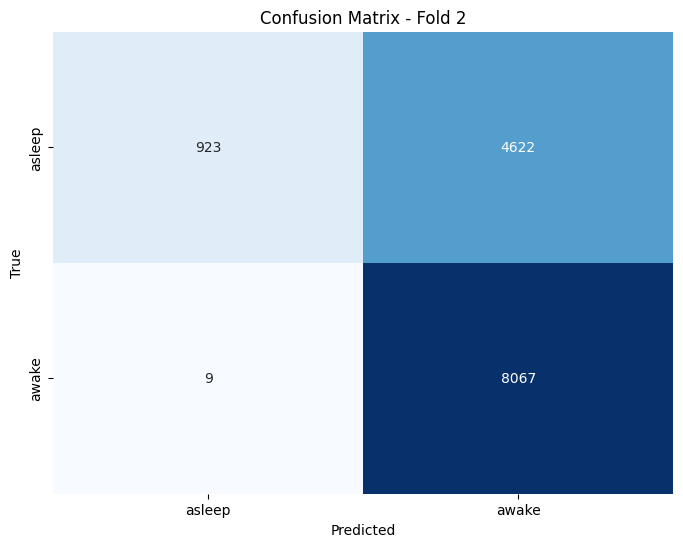

F1 Score - Fold 2: 0.7769804960269685
426/426 [==============================] - 2s 4ms/step


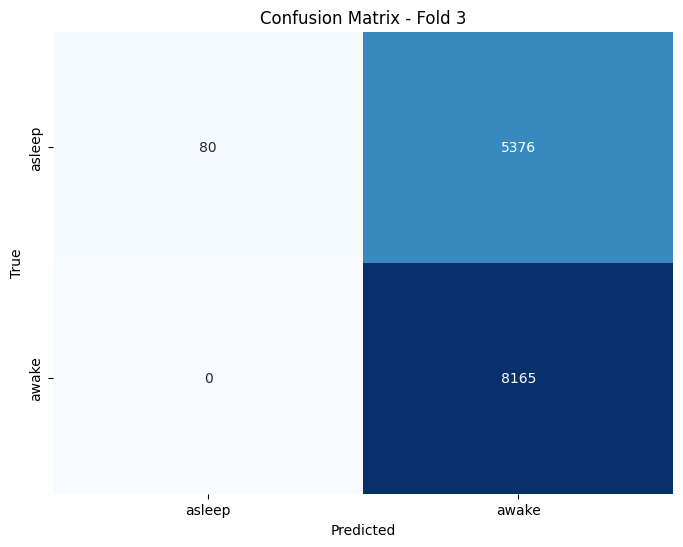

F1 Score - Fold 3: 0.7523265456555791


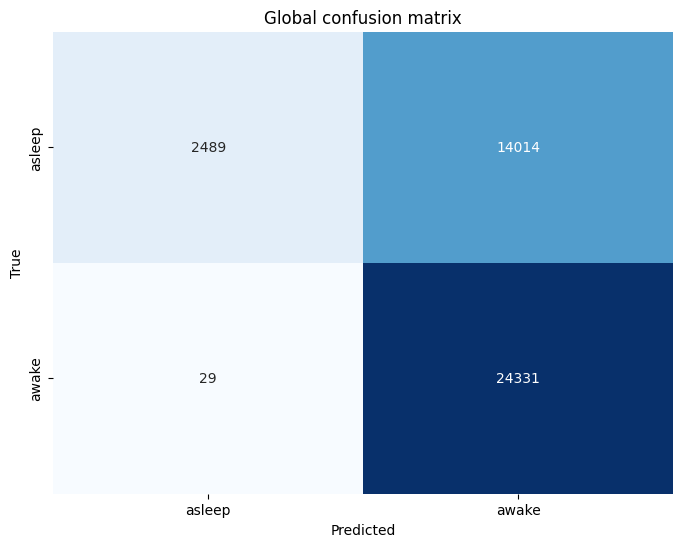

Mean F1 Score across all folds: 0.7766135989160928


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, title):
    # Plot confusion matrix
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["asleep", "awake"], yticklabels=["asleep", "awake"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()

f1_scores = []
mean_confusion_matrix = np.zeros((2, 2))

for i, (train_index, test_index) in enumerate(kf.split(input_training_mice)):
    # Evaluate the trained model on the test fold
    predictions = (trained_mlp[i].predict(input_training_mice.loc[test_index]) > 0).astype(int)
    true_labels = (np.array(output_training_mice)[test_index] > 0).astype(int)
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    mean_confusion_matrix += confusion_matrix(true_labels, predictions)

    # Compute confusion matrix and plot
    plot_confusion_matrix(cm, f'Confusion Matrix - Fold {i + 1}')

    # Compute F1 score
    f1 = f1_score(true_labels, predictions)
    f1_scores.append(f1)
    print(f"F1 Score - Fold {i + 1}: {f1}")

# Plot mean confusion matrix
plot_confusion_matrix(mean_confusion_matrix, 'Global confusion matrix')

# Calculate and display the mean F1 score across all folds
mean_f1_score = np.mean(f1_scores)
print(f"Mean F1 Score across all folds: {mean_f1_score}")

## Résultat

On a un modèle qui arrive très bien a reconnaître les états réveiller mais il a beaucoup plus de difficulté a reconnaître les états endormis.
